# Eine Handelsstrategie implementieren in Python

## Frage: Kaufen Menschen mehr Aktien, die ihre Aufmerksamkeit bekommen? 
Wie messen? Aufmerksamkeit über Google Trends Data

In [2]:
from datetime import datetime, timedelta
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import os
import time
import seaborn as sns
os.chdir('/Users/marius/Downloads')
filename = ' '


def getAttention(url):
    #os.chdir('/Users/marius/Downloads')
    #os.remove("multiTimeline.csv")
    driver.get(url)
    time.sleep(2)
    webelem = driver.find_element_by_css_selector('.widget-actions-item.export')
    time.sleep(2)
    webelem.click()


# Getting the data from Google Trends

In [11]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome()

url = "https://trends.google.com/trends/explore?date=all&geo=US&q=MSFT"
url2 = "https://trends.google.com/trends/explore?date=2018-01-01%202018-03-01&geo=US&q=MSFT"
driver.get(url)

time.sleep(5)

first_bucket_start = ("2004-01-01","2006-01-01","2008-01-01","2010-01-01", "2012-01-01", "2014-01-01","2016-01-01")
first_bucket_end = ("2004-06-30", '2006-06-30','2008-06-30','2010-06-30','2012-06-30', '2014-06-30', '2016-06-30')
second_bucket_start = ("2004-07-01", '2006-07-01','2008-07-01','2010-07-01',"2012-07-01", "2014-07-01","2016-07-01")
second_bucket_end = ("2004-12-31", '2006-12-31','2008-12-31','2010-12-31','2012-12-31', '2014-12-31', '2016-12-31')
third_bucket_start =("2005-01-01", '2007-01-01','2009-01-01','2011-01-01', '2013-01-01', '2015-01-01', '2017-01-01')
third_bucket_end =("2005-06-30", '2007-06-30','2009-06-30','2011-06-30', '2013-06-30', '2015-06-30', '2017-06-30')
forth_bucket_start =("2005-07-01", '2007-07-01','2009-07-01','2011-07-01',"2013-07-01", "2015-07-01")
forth_bucket_end = ("2005-12-31", '2007-12-31','2009-12-31','2011-12-31','2013-12-31', '2015-12-31')

company_list = ['AAPL', 'MSFT', 'AMZN']

os.chdir('/Users/marius/Downloads')
#os.rename("multiTimeline.csv", 'b.kml')
## Download the data for all companies
# setting up the link structure
### Find global maximum half year#####
  ## Step 1 - find local maxima
for companyinlist in company_list:
    resultlist = []
    semiglobal_resultlist = []
    company = companyinlist
    #setup basic link structure
    start ="https://trends.google.com/trends/explore?"
    for i in range(0,7):
        if i<6: 
            date_initial = first_bucket_start[i] + '%20'+ first_bucket_end[i] 
            date_comparison1 = second_bucket_start[i] +'%20' + second_bucket_end[i] 
            date_comparison2 = third_bucket_start[i] + '%20' + third_bucket_end[i]
            date_comparison3 = forth_bucket_start[i] + '%20' + forth_bucket_end[i]
            fulldate = "date=" + date_initial + "," + date_comparison1 + "," + date_comparison2 + "," + date_comparison3 
            Geo = "&geo=US,US,US,US&"
            Search = company
            Search_term= "q=" + Search +"," + Search + "," + Search + "," + Search
            full_output =start + fulldate + Geo + Search_term
            url = full_output
            getAttention(url)
        else: 
            date_initial = first_bucket_start[i] + '%20' + first_bucket_end[i]
            date_comparison1 = second_bucket_start[i] + '%20' + second_bucket_end[i]
            date_comparison2 = third_bucket_start[i] + '%20' + third_bucket_end[i]
            fulldate = "date=" + date_initial + "," + date_comparison1 + "," + date_comparison2
            Geo = "&geo=US,US,US&"
            Search = company
            Search_term= "q=" + Search + "," + Search + "," + Search
            full_output = start + fulldate + Geo + Search_term
            url = full_output
            getAttention(url)
            ## read downloaded csv and identify maximum
        if i<6: 
            os.chdir('/Users/marius/Downloads')
            time.sleep(2)
            dat_1 = pd.read_csv('multiTimeline (1).csv',index_col=None, sep=',')
            # create a new index column
            dat_1.reset_index(inplace=True)
            dat_1 = dat_1.iloc[1:]
            dat_1.columns = ["Day1","Value1","Day2","Value2","Day3","Value3","Day4","Value4"]
            df1 = pd.concat([dat_1['Day1'], dat_1['Day2'], dat_1['Day3'], dat_1['Day4']])
            df2 = pd.concat([dat_1['Value1'], dat_1['Value2'], dat_1['Value3'], dat_1['Value4']])
            result = pd.concat([df1, df2], axis=1)
            result.columns = ['Date', 'Value']
        else:
            os.chdir('/Users/marius/Downloads')
            time.sleep(2)
            dat_1 = pd.read_csv('multiTimeline (1).csv',index_col=None, sep=',')
            # create a new index column
            dat_1.reset_index(inplace=True)
            dat_1 = dat_1.iloc[1:]
            dat_1.columns = ["Day1","Value1","Day2","Value2","Day3","Value3"]
            df1 = pd.concat([dat_1['Day1'], dat_1['Day2'], dat_1['Day3']])
            df2 = pd.concat([dat_1['Value1'], dat_1['Value2'], dat_1['Value3']])
            result = pd.concat([df1, df2], axis=1)
            result.columns = ['Date', 'Value']
            #find maximum in data
        for j in range(1, len(result)):
            if (result.iat[j,1]=='100'):
                maximum = result.iat[j,0]
        global_max_month = maximum
        year = maximum[:4]
        month = maximum[5:-3]
        month = pd.to_numeric(month)
        if month<6:
            month_start="01-01"
            month_end = "06-30"
        else:
            month_start ="07-01"
            month_end = "12-31"
        date_start = year+ "-" + month_start
        date_end = year + "-" + month_end
            ##Series i maximum is now found and saved
        saved_result = date_start + '%20' + date_end
        resultlist.append(saved_result)
        os.remove("multiTimeline (1).csv")
        # local maxima are found
    
    ### Step 2: find semi-global maxima
    
    date_initial =  resultlist[0]
    date_comparison1 = resultlist[1]
    date_comparison2 = resultlist[2]
    date_comparison3 = resultlist[3]
    fulldate = "date=" + date_initial + "," + date_comparison1 + "," + date_comparison2 + "," + date_comparison3 
    Geo = "&geo=US,US,US,US&"
    Search = company
    Search_term= "q=" + Search +"," + Search + "," + Search + "," + Search
    full_output =start + fulldate + Geo + Search_term
    url = full_output
    getAttention(url)
    os.chdir('/Users/marius/Downloads')
    time.sleep(2)
    dat_1 = pd.read_csv('multiTimeline (1).csv',index_col=None, sep=',')
    # create a new index column
    dat_1.reset_index(inplace=True)
    dat_1 = dat_1.iloc[1:]
    dat_1.columns = ["Day1","Value1","Day2","Value2","Day3","Value3","Day4","Value4"]
    df1 = pd.concat([dat_1['Day1'], dat_1['Day2'], dat_1['Day3'], dat_1['Day4']])
    df2 = pd.concat([dat_1['Value1'], dat_1['Value2'], dat_1['Value3'], dat_1['Value4']])
    result = pd.concat([df1, df2], axis=1)
    result.columns = ['Date', 'Value']
    for j in range(1, len(result)):
            if (result.iat[j,1]=='100'):
                maximum = result.iat[j,0]
    global_max_month = maximum
    year = maximum[:4]
    month = maximum[5:-3]
    month = pd.to_numeric(month)
    if month<6:
        month_start="01-01"
        month_end = "06-30"
    else:
        month_start ="07-01"
        month_end = "12-31"
    date_start = year+ "-" + month_start
    date_end = year + "-" + month_end
    ##Series i maximum is now found and saved
    saved_result = date_start + '%20' + date_end
    semiglobal_resultlist.append(saved_result)
    os.remove("multiTimeline (1).csv")    
    
    date_initial =      resultlist[4] 
    date_comparison1 = resultlist[5]
    date_comparison2 = resultlist[6]
    fulldate = "date=" + date_initial + "," + date_comparison1 + "," + date_comparison2
    Geo = "&geo=US,US,US&"
    Search = company
    Search_term= "q=" + Search +"," + Search + "," + Search
    full_output =start + fulldate + Geo + Search_term
    url = full_output
    getAttention(url)
    os.chdir('/Users/marius/Downloads')
    time.sleep(2)
    dat_1 = pd.read_csv('multiTimeline (1).csv',index_col=None, sep=',')
    # create a new index column
    dat_1.reset_index(inplace=True)
    dat_1 = dat_1.iloc[1:]
    dat_1.columns = ["Day1","Value1","Day2","Value2","Day3","Value3"]
    df1 = pd.concat([dat_1['Day1'], dat_1['Day2'], dat_1['Day3']])
    df2 = pd.concat([dat_1['Value1'], dat_1['Value2'], dat_1['Value3']])
    result = pd.concat([df1, df2], axis=1)
    result.columns = ['Date', 'Value']
    for j in range(1, len(result)):
            if (result.iat[j,1]=='100'):
                maximum = result.iat[j,0]
    global_max_month = maximum
    year = maximum[:4]
    month = maximum[5:-3]
    month = pd.to_numeric(month)
    if month<6:
        month_start="01-01"
        month_end = "06-30"
    else:
        month_start ="07-01"
        month_end = "12-31"
    date_start = year+ "-" + month_start
    date_end = year + "-" + month_end
    ##Series i maximum is now found and saved
    saved_result = date_start + '%20' + date_end
    semiglobal_resultlist.append(saved_result)
    os.remove("multiTimeline (1).csv") 

    ## Step 3: find truly global maximum
    date_initial =      semiglobal_resultlist[0] 
    date_comparison_1 = semiglobal_resultlist[1] 
    fulldate = "date=" + date_initial + "," + date_comparison1
    Geo = "&geo=US,US&"
    Search = company
    Search_term= "q=" + Search +"," + Search 
    full_output =start + fulldate + Geo + Search_term
    url = full_output
    getAttention(url)
    os.chdir('/Users/marius/Downloads')
    time.sleep(2)
    dat_1 = pd.read_csv('multiTimeline (1).csv',index_col=None, sep=',')
    dat_1.reset_index(inplace=True)
    dat_1 = dat_1.iloc[1:]
    dat_1.columns = ["Day1","Value1","Day2","Value2"]
    df1 = pd.concat([dat_1['Day1'], dat_1['Day2']])
    df2 = pd.concat([dat_1['Value1'], dat_1['Value2']])
    result = pd.concat([df1, df2], axis=1)
    result.columns = ['Date', 'Value']
    for j in range(1, len(result)):
            if (result.iat[j,1]=='100'):
                maximum = result.iat[j,0]
    global_max_month = maximum
    year = maximum[:4]
    month = maximum[5:-3]
    month = pd.to_numeric(month)
    if month<6:
        month_start="01-01"
        month_end = "06-30"
    else:
        month_start ="07-01"
        month_end = "12-31"
    date_start = year+ "-" + month_start
    date_end = year + "-" + month_end
    ##Series i maximum is now found and saved
    saved_result = date_start + '%20' + date_end
    date_maximum = saved_result
    os.remove("multiTimeline (1).csv") 
    
     ### Global Maximum is now found ####
  ## Create different URLs now and let browser download all files
  ## Initiate Download links for all 7 queries incl. global maximum for comparison
  # Downloadlink for all data incl. scaling global maximum
    for i in range(0,7):
            if i<6: 
                date_initial = first_bucket_start[i] + '%20'+ first_bucket_end[i] 
                date_comparison1 = second_bucket_start[i] +'%20' + second_bucket_end[i] 
                date_comparison2 = third_bucket_start[i] + '%20' + third_bucket_end[i]
                date_comparison3 = forth_bucket_start[i] + '%20' + forth_bucket_end[i]
                fulldate = "date=" + date_initial + "," + date_comparison1 + "," + date_comparison2 + "," + date_comparison3 + "," + date_maximum 
                Geo = "&geo=US,US,US,US,US&"
                Search = company
                Search_term= "q=" + Search +"," + Search + "," + Search + "," + Search + "," + Search
                full_output =start + fulldate + Geo + Search_term
                url = full_output
                getAttention(url)
            else: 
                date_initial = first_bucket_start[i] + '%20' + first_bucket_end[i]
                date_comparison1 = second_bucket_start[i] + '%20' + second_bucket_end[i]
                date_comparison2 = third_bucket_start[i] + '%20' + third_bucket_end[i]
                fulldate = "date=" + date_initial + "," + date_comparison1 + "," + date_comparison2 + "," + date_maximum
                Geo = "&geo=US,US,US,US&"
                Search = company
                Search_term= "q=" + Search + "," + Search + "," + Search + "," + Search
                full_output = start + fulldate + Geo + Search_term
                url = full_output
                getAttention(url)
    ## import data and merge into one time series
    dat_1 = pd.read_csv('multiTimeline (1).csv',index_col=None, sep=',')
    # create a new index column
    dat_1.reset_index(inplace=True)
    dat_1 = dat_1.iloc[1:]
    dat_1.columns = ["Day1","Value1","Day2","Value2","Day3","Value3","Day4","Value4","Day5","Value5"]
    df1 = pd.concat([dat_1['Day1'], dat_1['Day2'], dat_1['Day3'], dat_1['Day4']])
    df2 = pd.concat([dat_1['Value1'], dat_1['Value2'], dat_1['Value3'], dat_1['Value4']])
    result1 = pd.concat([df1, df2], axis=1)
    result1.columns = ['Date', 'Value']
   
    dat_2 = pd.read_csv('multiTimeline (2).csv',index_col=None, sep=',')
    dat_2.reset_index(inplace=True)
    dat_2 = dat_2.iloc[1:]
    dat_2.columns = ["Day1","Value1","Day2","Value2","Day3","Value3","Day4","Value4","Day5","Value5"]
    df3 = pd.concat([dat_2['Day1'], dat_2['Day2'], dat_2['Day3'], dat_2['Day4']])
    df4 = pd.concat([dat_2['Value1'], dat_2['Value2'], dat_2['Value3'], dat_2['Value4']])
    result2 = pd.concat([df3, df4], axis=1)
    result2.columns = ['Date', 'Value']
  
    dat_3 = pd.read_csv('multiTimeline (3).csv',index_col=None, sep=',')
    dat_3.reset_index(inplace=True)
    dat_3 = dat_3.iloc[1:]
    dat_3.columns = ["Day1","Value1","Day2","Value2","Day3","Value3","Day4","Value4","Day5","Value5"]
    df5 = pd.concat([dat_3['Day1'], dat_3['Day2'], dat_3['Day3'], dat_3['Day4']])
    df6 = pd.concat([dat_3['Value1'], dat_3['Value2'], dat_3['Value3'], dat_3['Value4']])
    result3 = pd.concat([df5, df6], axis=1)
    result3.columns = ['Date', 'Value']
    
    dat_4 = pd.read_csv('multiTimeline (4).csv',index_col=None, sep=',')
    dat_4.reset_index(inplace=True)
    dat_4 = dat_4.iloc[1:]
    dat_4.columns = ["Day1","Value1","Day2","Value2","Day3","Value3","Day4","Value4","Day5","Value5"]
    df7 = pd.concat([dat_4['Day1'], dat_4['Day2'], dat_4['Day3'], dat_4['Day4']])
    df8 = pd.concat([dat_4['Value1'], dat_4['Value2'], dat_4['Value3'], dat_4['Value4']])
    result4 = pd.concat([df7, df8], axis=1)
    result4.columns = ['Date', 'Value']
    
    dat_5 = pd.read_csv('multiTimeline (5).csv',index_col=None, sep=',')
    dat_5.reset_index(inplace=True)
    dat_5 = dat_5.iloc[1:]
    dat_5.columns = ["Day1","Value1","Day2","Value2","Day3","Value3","Day4","Value4","Day5","Value5"]
    df9 = pd.concat([dat_5['Day1'], dat_5['Day2'], dat_5['Day3'], dat_5['Day4']])
    df10 = pd.concat([dat_5['Value1'], dat_5['Value2'], dat_5['Value3'], dat_5['Value4']])
    result5 = pd.concat([df9, df10], axis=1)
    result5.columns = ['Date', 'Value']
    
    dat_6 = pd.read_csv('multiTimeline (6).csv',index_col=None, sep=',')
    dat_6.reset_index(inplace=True)
    dat_6 = dat_6.iloc[1:]
    dat_6.columns = ["Day1","Value1","Day2","Value2","Day3","Value3","Day4","Value4","Day5","Value5"]
    df11 = pd.concat([dat_6['Day1'], dat_6['Day2'], dat_6['Day3'], dat_6['Day4']])
    df12 = pd.concat([dat_6['Value1'], dat_6['Value2'], dat_6['Value3'], dat_6['Value4']])
    result6 = pd.concat([df11, df12], axis=1)
    result6.columns = ['Date', 'Value']
    
    dat_7 = pd.read_csv('multiTimeline (7).csv',index_col=None, sep=',')
    dat_7.reset_index(inplace=True)
    dat_7 = dat_7.iloc[1:]
    dat_7.columns = ["Day1","Value1","Day2","Value2","Day3","Value3","Day4","Value4"]
    df13 = pd.concat([dat_7['Day1'], dat_7['Day2'], dat_7['Day3']])
    df14 = pd.concat([dat_7['Value1'], dat_7['Value2'], dat_7['Value3']])
    result7 = pd.concat([df13, df14], axis=1)
    result7.columns = ['Date', 'Value']
    
    #for (p in range(552,735):
     # dat_7[p,1]=0
     # dat_7[p,2]=0
  
    dff1 = pd.concat([result1['Date'],result2['Date'],result3['Date'],result4['Date'],result5['Date'],result6['Date'],result7['Date']])
    dff2 = pd.concat([result1['Value'],result2['Value'],result3['Value'],result4['Value'],result5['Value'],result6['Value'],result7['Value']])
    data_final = pd.concat([dff1, dff2], axis=1)
    data_final.to_csv(company + 'out.csv')
    os.remove("multiTimeline (1).csv")
    os.remove("multiTimeline (2).csv")
    os.remove("multiTimeline (3).csv")
    os.remove("multiTimeline (4).csv")
    os.remove("multiTimeline (5).csv")
    os.remove("multiTimeline (6).csv")
    os.remove("multiTimeline (7).csv")
    time.sleep(1)

    

KeyboardInterrupt: 

In [159]:
# next step is to access the output files and combine them to a full dataset
os.chdir('/Users/marius/Downloads')
df_combined = pd.DataFrame(columns=['Index', 'Date', 'Name', 'Value'])
for company in company_list:
    df_1 = pd.read_csv(company+'out.csv',index_col=None, sep=',')
    # delete data points where value is -1
    df_1 = df_1[df_1.Value != -1]
    df_1['Date'] = pd.to_datetime(df_1['Date'], format='%Y.%m')
    df_1['Name'] = company
    df_1.columns.values[0] ='Index'
    df_combined = pd.concat([df_combined, df_1], axis=0)
    df_combined.to_csv('Trendsout.csv')


In [167]:
company_list = ['AAPL', 'MSFT', 'AMZN']

In [6]:
# get stock prices
#! pip install iexfinance

from iexfinance import get_historical_data
from datetime import datetime

start = datetime(2013, 1, 1)
end = datetime(2017, 1, 1)

company_prices = pd.DataFrame(columns=['open', 'high', 'low', 'close'])
for company in company_list:
    df = get_historical_data(company, start=start, end=end, output_format='pandas')
    df['Names'] = company
    print(company_prices)
    company_prices = pd.concat([company_prices, df], axis=0)


company_prices.to_csv('pricesout.csv')



NameError: name 'company_list' is not defined

In [3]:
# Merge datasets
df_1 = pd.read_csv('Trendsout.csv',index_col=None, sep=',')
df_2 = pd.read_csv('pricesout.csv',index_col=None, sep=',')
df_2.columns = ['Date', 'Names', 'close', 'high', 'low', 'open', 'volume']
#df_2['Date'] = pd.to_datetime(df_2['Date'], format='%Y.%m')

# create inner join between both sets
# set primary key
df_1['Ident'] = df_1['Date']+df_1['Name']
df_2['Ident'] = df_2['Date']+df_2['Names']
df_3 = df_1.set_index('Ident').join(df_2.set_index('Ident'), lsuffix='_caller', rsuffix='_other')
# drop all elements where one column shows NaN
df_3 = df_3.dropna()
df_3 = df_3.drop(['Date_other', 'Names', 'Index'], axis=1)

#df_3['Return'] = ((df_3.close[1:] - df_3.close[:-1] / df_3.close[1:])-100)/100
df_3['Return'] = df_3.close.pct_change()
df_3 = df_3.dropna()



## Trading Strategy Implementation
Buy those stocks that had high attention and high returns yesterday, because people think the stock price continues to increase

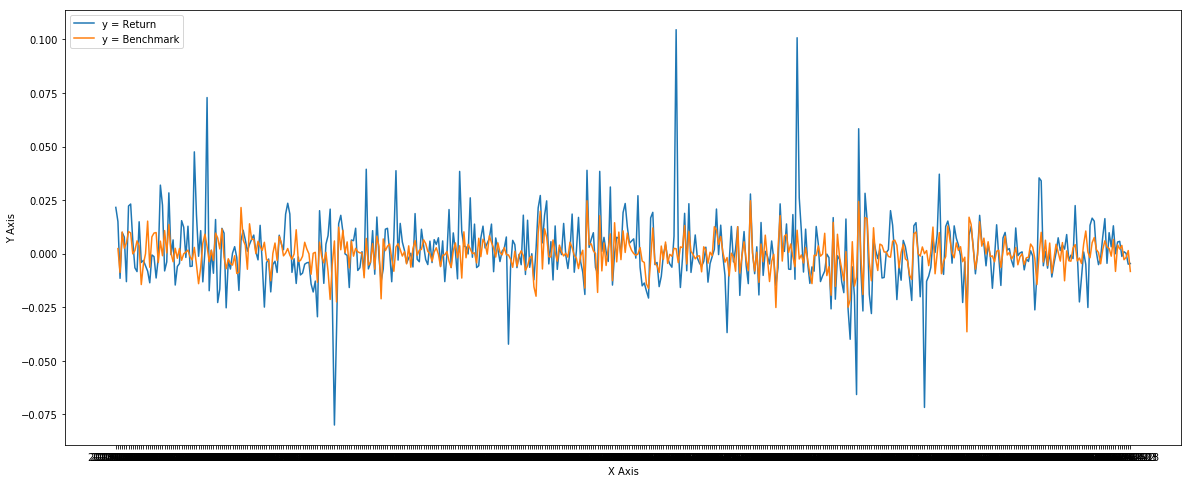

In [8]:

# calculate 10 day average value
df_3['Avg'] = df_3.Value.rolling(window=10, min_periods=10).mean()
df_3['Trend'] = np.log(df_3.Value+1)/np.log(df_3.Avg+1) 

#g = df_3.groupby('Date_caller')
series = df_3['Trend'].groupby(df_3.Date_caller).mean()
series.to_frame
df_4 = pd.DataFrame({'Date':series.index, 'Values':series.values})
df_4.columns = ['Date_caller', 'Avg_Attention']
# join the attention maxima to the dataset
df_5 = df_3.set_index('Date_caller').join(df_4.set_index('Date_caller'), lsuffix='_caller', rsuffix='')
df_5.reset_index(inplace=True)
df_5= df_5.sort_values(by=['Name', 'Date_caller'])
# show signal; buy high return high attention on previous day --> should go up further

df_5['Att_sign'] = np.where(df_5['Avg_Attention']<=df_5['Trend'], 1, 0)
df_5['Rtr_sign'] = np.where(df_5['Return']>=0, 1, 0)
df_5['Trd_sign'] = df_5['Att_sign'].shift(1)+df_5['Rtr_sign'].shift(1)-1

## Now set up portfolio return
# delete all stocks that i dont trade
df_6 = df_5[df_5.Trd_sign != -1]
df_6 = df_6[df_6.Trd_sign != 0]

portfolio = df_6['Return'].groupby(df_6.Date_caller).mean()
Portfolio_return = pd.DataFrame({'Date':portfolio.index, 'Return':portfolio.values})
Portfolio_return.columns = ['Date', 'Return']
Portfolio_return

## get benchmark data
#start = datetime(2015, 1, 1)
#end = datetime(2018, 1, 1)

company_prices = pd.DataFrame(columns=['open', 'high', 'low', 'close'])
Benchmark = 'SPY'
df = get_historical_data(Benchmark, start=start, end=end, output_format='pandas')
df['Names'] = Benchmark
company_prices = pd.concat([company_prices, df], axis=0)
company_prices['Return'] = company_prices.close.pct_change()
company_prices = company_prices.dropna()
company_prices.reset_index(inplace=True)
# drop unnessary rows
company_prices = company_prices.drop(['Names','close', 'high', 'low', 'open', 'volume'], axis=1)
company_prices.columns = ['Date', 'Return_Benchmark']
company_prices

# join portfolio and benchmark
df_7 = Portfolio_return.set_index('Date').join(company_prices.set_index('Date'), lsuffix='_caller', rsuffix='')
df_7.reset_index(inplace=True)




plt.figure(figsize=(20,8))
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.plot(df_7['Date'], df_7['Return'], '-')
plt.plot(df_7['Date'], df_7['Return_Benchmark'], '-')
plt.legend(['y = Return', 'y = Benchmark'], loc='upper left')
plt.show()

# Portfolio Return Analysis

In [9]:
# calculating the benchmark & portfolio returns on a monthly basis
df_7['Date_2'] = pd.to_datetime(df_7['Date'].astype(str), format='%Y-%m-%d')

df_7.set_index('Date_2')
df_7['Date_2'] = df_7['Date_2'].astype(str).str[:7]

df_8 = df_7.groupby('Date_2')['Return_Benchmark'].sum()
df_9 = df_7.groupby('Date_2')['Return'].sum()

df_8 = pd.Series.to_frame(df_8)
df_9 = pd.Series.to_frame(df_9)

# merge both sets
df_10 = df_8.join(df_9, lsuffix='_caller', rsuffix='')


df_10 = df_10.reset_index()



# Visualization of Portfolio Returns

In [10]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

import pandas as pd


trace_high = go.Scatter(
                x=df_10.Date_2,
                y=df_10.Return_Benchmark,
                name = "Benchmark Return",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=df_10.Date_2,
                y=df_10.Return,
                name = "Portfolio Return",
                line = dict(color = '#FB1D5C'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Attention-based Trading Strategy",
    yaxis=dict(tickformat=".2%"),
    xaxis = dict(
        range = ['2013-01','2017-06'])
)

fig = dict(data=data, layout=layout)
py.offline.iplot(fig, filename = "Trading Strategy Performance")